In [12]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:

data = load_breast_cancer()
X = data.data
y = data.target

In [14]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [15]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [16]:

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'eta': 0.1
}

In [17]:

evals = [(dtrain, 'train'), (dval, 'validation')]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)

In [21]:
evals_result = {}  # <-- Add this line

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    evals_result=evals_result,  # <-- Important
    verbose_eval=False,
 
)

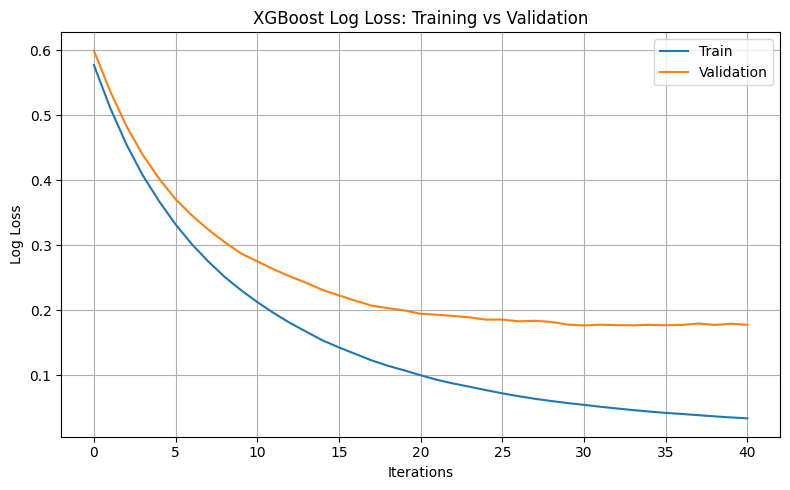

In [24]:

# Plot log loss over iterations
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(8, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['validation']['logloss'], label='Validation')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss: Training vs Validation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:

dtest = xgb.DMatrix(X_test)
preds = model.predict(dtest)
pred_labels = [1 if i > 0.5 else 0 for i in preds]
accuracy = accuracy_score(y_test, pred_labels)
print(f" Test Accuracy: {accuracy:.4f}")


 Test Accuracy: 0.9561
